# Análisis de la posible evolución de pandemia COVID-19 basado en modelos SEIR en Colombia y la Orinoquia


#### Implementación computacional adaptada por:
A. Cruz-Roa, 
[GI GITECX](http://gitecx.unillanos.edu.co/), 
[SI AdaLab](http://adalab.unillanos.edu.co/), 
Escuela de Ingeniería, 
[Facultad de Ciencias Básicas e Ingeniería](http://fcbi.unillanos.edu.co/fcbi/), 
[Universidad de los Llanos](https://www.unillanos.edu.co/)

#### Modelado matemático ajustado por:
L. Ladino-Martínez,
GI Sistemas Dinámicos,
Departamento de Matemáticas y Física,
[Facultad de Ciencias Básicas e Ingeniería](http://fcbi.unillanos.edu.co/fcbi/), 
[Universidad de los Llanos](https://www.unillanos.edu.co/)

#### Análisis de parámetros epidemiológicos por:
O. Gutiérrez-Lesmes,
GI Cuidado,
Facultad de Ciencias de la Salud
Universidad de los Llanos

## Modelo SEIR (Susceptible-Expuestos-Infectados-Recuperados)

El modelo SEIR consiste en asumir que el total de la población se puede dividir en cuatro grupos: suceptibles (S), expuestos (E), infectados (I) o recuperados (R).

El modelo SEIR es una adaptación del modelo SIR, el cual fue propuesto por W. O. Kermack y A. G. McKendrick en 1927 (Kermack & McKendrick, 1927). 


<img src="SEIR.png">
Figura 1. Esquema del modelo SEIR donde dada una infección los individuos pasan de un grupo a otro, pasando de susceptibles a expuestos, luego de expuestos a infectados, y finalmente de infectados a recuperados.

Para muchas infecciones existe un significativo periodo de incubación, existen trabajos previos de otras
enfermedades infecciosas similares como otros coronavirus (MERS o SARS)(Yunhwan et lal, 2016; Dye & Gay 2003). Este modelo se adapta bien a COVID-19 debido a que además de los susceptibles de ser infectados, a los ya infectados y a los recuperados, es conveniente también tener en cuenta a los expuestos, estos son los individuos que portan la enfermedad pero que, al hallarse en su periodo de incubación, no muestran síntomas y aún no pueden infectar a otros. De hecho, recientemente se han publicado algunos trabajos con modelos basados en SEIR que también incluyen la población de asintomáticos ($A$) y hospitalizados ($H$) [refs].

Además, recientemente se encuentran algunos trabajos publicados estimando el periodo de incubación del SARS-Cov-2 causante de la enfermedad COVID-19[refs].

### Modelo SEIRD  ($M_2$)

Matemáticamente el modelo SEIRD propuesto, denotado como $M_2$, se representa por un sistema de ecuaciones diferenciales ordinarias (EDOs). Este modelo asume que el total de la población ($N$) es la suma de los individuos clasificados en cada uno de los grupos suceptibles ($S$), expuestos ($E$), infectados ($I$), recuperados ($R$) y muertos (D), así: $N=S+E+I+R+D$. Bajo el sistema de ecuaciones diferenciales, este modelo no considera nacimientos ni muertes por causas naturales. Sin embargo, este modelo $M_2$ si considera muertes debido a la enfermedad e incluye una subpoblación $D$ que representa el número de muertos en el tiempo ($D(t)$). Teniendo en cuenta que $N=S+E+I+R+D$, entonces $N$ permanece constante en el modelo $M_2$. De esta forma, definimos el modelo SEIRD propuesto con el siguiente sistema de ecuaciones diferenciales:

\begin{align}
\frac{dS} {dt} &= -\beta \frac{S}{N} I \\\\
\frac{dE}{dt}  &= \beta \frac{S}{N} I -\sigma E \\\\
\frac{dI}{dt} &= \sigma E - \gamma I - \mu I \\\\
\frac{dR}{dt} &= \gamma I \\\\
\frac{dD}{dt} &= \mu I
\end{align}

donde,

$S:$ Subpoblación susceptibles

$E: $ Subpoblación expuestos (latentes)

$I:$ Subpoblación infectados

$R: $ Subpoblación recuperados

$D: $ Subpoblación muertos

$\beta: $ Tasa de infección o Probabilidad de transmisión de la enfermedad por contacto

$\sigma:$ Tasa per cápita de transferencia de la subpoblación expuesta a la subpoblación infectada (expuesto -> infectado)

$\gamma:$ Tasa de recuperación per cápita, i.e. Velocidad de recuperación (infectado -> recuperado)

$\mu:$ Tasa de mortalidad per cápita debido a la enfermedad (infectado -> fallecido)

La disminución del tamaño de la población sana con el tiempo será proporcional al tamaño de la subpoblación infectada ($I$) y la cantidad (proporcional) de las mismas $S/N$. Además, se define un factor de probabilidad por día de infectar a otra persona denominado $\beta$ (tasa de infección). El tamaño de la subpoblación expuesta ($E$) aumentará en proporción de $S/N$. Lo cual queda expresado como:

\begin{align}
\frac{dS} {dt} &= -\beta \frac{S}{N} I \\\\
\frac{dE}{dt}  &= \beta \frac{S}{N} I \\\\
\end{align}

Una vez que una persona está en la subpoblación expuesta ($E$), es necesario un tiempo para mostrar los síntomas y llegar a estar infectada ($I$). Este tiempo, denominado tiempo de incubación, depende de cada caso, y para el COVID-19 en promedio se ha estimado que se necesita alrededor de 7 días (ref). Lo anterior se modela como una *tasa* de pasar de expuesto ($E$) a infectado ($I$), de forma que $1/\sigma$ es el tiempo promedio de incubación, por tanto, $\sigma = 1/7$ por día. De esta forma, la disminución de expuestos con el tiempo sera proporcional a la población de expuestos ($E$), que luego pasan a estar infectados ($I$), lo cual se puede expresar como:

$$
\begin{align}
\frac{dE}{dt} = -\sigma E \\\\
\frac{dI}{dt} = \sigma E 
\end{align}
$$

Finalmente, una persona enferma puede recuperarse o fallecer. Si la persona se recupera, esto se puede modelar como una *tasa*, la cual se puede establecer a partir del numero de días que puede pasar de infectado a recuperado de acuerdo a los análisis en otros paises con una tasa de recuperación de $ \gamma =  1 / 5$ . La probabilidad de fallecer estimada por la OMS en estos momentos es del 4% ([Fuente: BBC](https://www.bbc.com/mundo/noticias-51708029)) ([Fuente: OMS](http://www.who.int/mediacentre/factsheets/fs103/en/)). Sin embargo, la tasa de mortalidad depende del país, por lo cual se suele denotar como $\textit{tasa per cápita de mortalidad por la enfermedad}$ $\mu$. Para Colombia, se podría establecer suponiendo una tasa similar a la de otro país, $\mu = 0.004$ ("The rate reported outside China in February was even lower (0.4%; two of 464)." Rajgor et al, 2020). 

$$
\begin{align}
\frac{dI}{dt} &= - \gamma I - \mu I \\\\ 
\frac{dR}{dt} &=  \gamma I
\end{align}
$$

Aún no se ha definido el valor de $\beta$, el cual indica la tasa de infección o velocidad de personas que se infectan. Para ello haremos uso de un parámetro importante: el número medio de personas que un paciente con COVID-19 podría llegar a infectar $R_0$, el cual para éste caso se define así:

$$R_0 = \frac{\beta}{\gamma+\mu}$$

Para COVID-19 se han estimado rangos de $R_0$ entre $2$ y $2.5$ ([Fuente: Nature](https://www.nature.com/articles/d41586-020-00758-2)), o entre $2.5$ y $3.5$ ([Fuente: The Lancet](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext)). En este caso usaremos el que se ha establecido recientemente $R_0=2.68$ (Wu et la., 2020), el cual es el que esta considerando el gobierno colombiano (ref).

La importancia de disminuir el factor $R_0$ esta relacionada con las medidas de salud pública, por ejemplo, durante la dinámica de la enfermedad, implementar medidas de aislamiento social, contención o mitigación van orientadas a disminuir este factor. Un $R_0$ alto puede indicar igualmente que la propagación de la enfermedad es alta y no se ha controlado y por tanto la necesidad de mayor inversión de la capacidad y recursos del sistema de salud o la necesidad de implementar mas medidas más fuertes de contención de la enfermedad para disminuir el valor de $R_0$ y así la velocidad de propagación de la enfermedad (refs).

## El número reproductivo básico ($R_0$)

El número reproductivo básico, $R_0$, es el número de infecciones secundarias que una persona infectada produciría en una población totalmente susceptible durante todo el período infeccioso.

$R_0$ proporciona una condición umbral para la estabilidad del punto de equilibrio libre de enfermedad (para la mayoría de los modelos) (refs):

* El punto de equilibrio libre de enfermedad es asintótica y localmente estable cuando $R_0 < 1$: la enfermedad se extingue.

* El punto de equilibrio libre de enfermedad es inestable cuando $R_0 > 1$: la enfermedad se establece en la población o se produce una epidemia.

* Para un modelo dado, usualmente se deja fijo un valor para el factor $R_0$.

Esta definición solo es válida para modelos autónomos homogéneos simples.

Puede definir condiciones de umbral similares para modelos más complicados que incluyen heterogeneidad y/o estacionalidad, pero la definición básica ya no es válida.

<img src="R0.png">

## hacer infografia de Ro de virus respiratorios

## Implementación y simulación del modelo SEIR para COVID-19 

Para este modelado y simulación se adaptó la implementación del Ejercicio de EDOs (modelo epidemiológico SEIR del virus del Ébola) de la [Charla - Taller sobre Python científico en la PyConES 2014 por CAChemE y Pybonacci](https://nbviewer.jupyter.org/github/Python-en-ciencia/Python-cientifico/blob/master/PythonCientifico-201411-PyConEs-CachemePybonacci/03-Scipy-ejercicio-ODEs-ebola.ipynb).


### Supuestos
Adicionalmente, pra este modelamiento y simulación se parte de los siguientes supuestos:

- Se asume que es una población cerrada y estable, es decir, que no ocurren nacimientos y muertes de forma natural y por tanto la población se mantiene constante. Sin embargo, en el modelo se incluye la muertes provocadas por la enfermedad en el tiempo como $D(t)$.
- Se toma como $t=0$ el día 24 de marzo de 2020 cuando ya se contaba con un número total de infectados de $I=419$ distribuidos en ese momento en $261$ importados, $147$ relacionados y $11$ en estudio. Tomando en cuenta que el número de casos relacionados es mayor a esa fecha es $I_r > 100$ se podría asumir transmisión comunitaria y por tanto se toma el número de infectados igual al número de casos relacionados $I(0)=147$.
- Se descartan los casos importados como parte de los infectados tomando en cuenta los protocolos establecidos en el país de aislamiento y cuarentena por lo cual la probabilidad de contagio es menor. Igualmente, se descartan los casos en estudio. Esto es por definición una población cerrada.  
- Se asume el número expuestos como un producto entre el número de casos relacionados por un factor $c$ del número posible de expuestos de los contactos extrechos de los infectados de casos relacionados. En este caso asumimos $c=7$

Incluimos las librerias y dependencias necesarias para la implementación

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
import datetime
import locale

Lo siguiente que debemos hacer es definir nuestro sistema de ec. diferenciales:

Se incluye la definición del sistema de ecuaciones diferenciales con la definición de los parámetros $\sigma$, $\gamma$ y $\mu$ con un $R_0$ 

In [2]:
def DiffEqs(y, t, sigma, gamma, mu, R_0):
    """ Modelo simple epidemiológico para la propagacion del virus de SARS-CoV-2 """
    
    # Recuperamos las variables dependientes de entrada
    S, E, I, R, D = y
    
    Nn = S + E + I + R # Total de personas vivas
    
    #--------------------------
    # Parámetros del modelo
    #---------------------------

    #https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30244-9/fulltext
    # The case fatality rate (CFR) was reported to be 15% (six of 41 patients) in the initial period,
    # 1 but this estimate was calculated from a small cohort of hospitalised patients. Subsequently, with more 
    # data emerging, the CFR decreased to between 4·3% and 11·0%,2,  3 and later to 3·4%.4 The rate reported 
    # outside China in February was even lower (0·4%; two of 464).5

    # Nº de personas contagiadas por infectado
    #R_0 = 2.68 # https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/

    beta = R_0*(gamma+mu) # Velocidad con la que se propaga la infección

    # Definimos las ecuaciones diferenciales
    dSdt = -beta*(S/Nn)*I
    dEdt = beta*(S/Nn)*I - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

Una vez hecho esto, podemos resolver el sistema:

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

/Users/angelcruz-roa/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def covid19(tiempo=365.0, R_0=2.68,N=49648685.0, c=8):
    global S
    global E
    global I
    global R
    global Ds
    global IT
    
    tiempo_simulacion = tiempo # días

    sigma = 1./7 # 1/7 Velocidad/Tasa convertirse en contagioso una vez expuesto (expuesto -> infectado)  
    gamma = 1./5 # 1/5 Velocidad/Tasa de recuperación o fallecimiento (infectado -> [recuperado o fallecido])
    mu = 0.004 # tasa de mortalidad
    #https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/ 
    #c = 8 # contactos extrechos promedio

    # 24 marzo de 2020
    Io = 147
    Ro = 31
    Do = 7
    Eo = Io * c

    t  = np.linspace(0., tiempo_simulacion, tiempo_simulacion)

    # Condiciones iniciales

    #N = 49648685 # Población total Colombia = 49648685, Orinoquia = , Meta = 1016672, Villavicencio = 506000 (Año 2017)

    y0 = [N, Eo, Io, Ro, Do] # [S, E, I, R, D]

    # Llamamos al ode para resolver las eq. diferenciales   
    #print(DiffEqs, y0, t, sigma, gamma, mu, Ro)
    solution = integrate.odeint(DiffEqs, y0, t, args=(sigma, gamma, mu, R_0))

    S = solution[:,0] #  S es el nº de personas sin infectar
    E = solution[:,1] #  E es el nº de portadores del virus no contagiosos (aún)
    I = solution[:,2] #  I es el nº de personas sintomáticas e infecciosas
    R = solution[:,3] #  R es el nº de personas recuperadas
    Ds = solution[:,4] #  D es el nº de personas fallecidas
    
    # Creamos la figura para representar los resultados

    fig = plt.figure(figsize=(10, 5))

    # Representamos las curvas de evolución con respecto al tiempo
    IT = (E + I) 
    plt.plot(t, (E + I))
    plt.plot(t, I)
    plt.plot(t, R)
    plt.plot(t, Ds)
    plt.plot(t, S)

    # Añadimos leyenda a los datos
    plt.legend(["nº infectados (E+I)",
            "nº infectados contagiosos (I)", 
            "nº recuperados (R)", 
            "nº fallecidos (D)",
            u"nº población sana "], loc=1)

    plt.suptitle(u'Simulación de un brote epidémico del virus SARS-CoV-2',
                 fontsize=14,
                 fontweight='bold')

    plt.xlabel(u"tiempo / días")
    plt.ylabel(u"Población / personas")

    plt.show()
    #fig.savefig('29-03-2020-SEIR_M2_colombia_covid19.png', dpi=300)

Ya podemos representar los resultados obtenidos

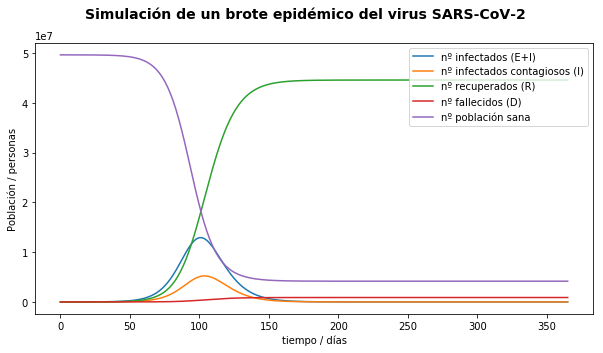

In [5]:
covid19(365, 2.68, 49648685, )
#interact(covid19, tiempo=(0,365), Ro=(1,3,0.01), N=(100000,49648685,100000), c=(1,10,1))

In [6]:
fechaCero = '24/03/2020'
numDias = 14 #+ 30 # estimación a 31 de marzo de 2020

idDia=int(np.argmax(np.array(I)))

fecha_base = pd.to_datetime(fechaCero, format='%d/%m/%Y') #datetime.datetime.today()
lista_fechas = [fecha_base + datetime.timedelta(days=x) for x in range(numDias)]

fechas = ["" for x in range(len(lista_fechas))]
for i in range(0,len(lista_fechas)):
    fechas[i] = lista_fechas[i].strftime("%m/%d/%Y")
print(fechas)

locale.setlocale(locale.LC_ALL, '')

print('\nDía pico desde el día cero (0) (' +fechaCero+'):\t'+ str(idDia))
print('\nFecha pico:\t'+str(fecha_base + datetime.timedelta(days=idDia)))
print('S: \t'+'{:,.2f}'.format(S[idDia]))
print('E: \t'+'{:,.2f}'.format(E[idDia]))
print('E+I: \t'+'{:,.2f}'.format(IT[idDia]))
print('I: \t'+'{:,.2f}'.format(I[idDia]))
print('R: \t'+'{:,.2f}'.format(R[idDia]))
print('Ds: \t'+'{:,.2f}'.format(Ds[idDia]))

['03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020']

Día pico desde el día cero (0) (24/03/2020):	103

Fecha pico:	2020-07-05 00:00:00
S: 	16,010,965.54
E: 	7,532,047.79
E+I: 	12,759,611.41
I: 	5,227,563.62
R: 	20,470,061.44
Ds: 	409,407.61


[147.  37.   3.  18.  15.  48.  19.  29.   0.   0.   0.   0.   0.   0.]
[147. 184. 187. 205. 220. 268. 287. 316.   0.   0.   0.   0.   0.   0.]


/Users/angelcruz-roa/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


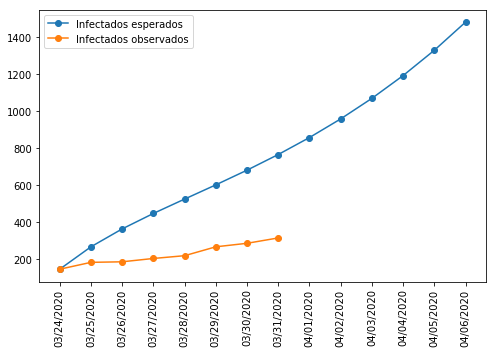

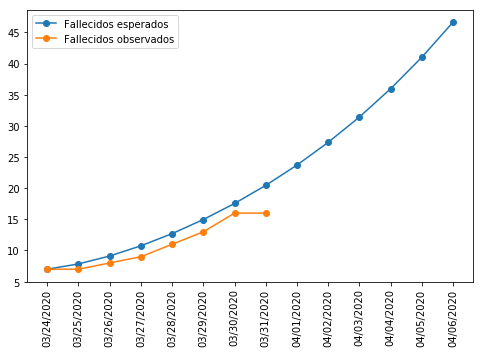

In [7]:
df = pd.read_excel('Casos1-31-marzo-2020.xlsx', sheet_name='Casos1')
df.fillna(0)

numDiasCasos = np.zeros(len(lista_fechas))
#print(df['Fecha de diagnóstico'])

#print(lista_fechas)

for i in df.index:
    for j in range(0,len(lista_fechas)):
        #print(str(df['Fecha de diagnóstico'][i].strftime("%m/%d/%Y"))+'--'+str(lista_fechas[j].strftime("%m/%d/%Y")))
        if df['Fecha de diagnóstico'][i].strftime("%m/%d/%Y") == lista_fechas[j].strftime("%m/%d/%Y") and df['Tipo*'][i]=="Relacionado":
            numDiasCasos[j] = numDiasCasos[j] + 1
            #print(df['Fecha'][i])

numDiasCasos[0]=147
print(numDiasCasos)
for j in range(1,len(lista_fechas)):
    if numDiasCasos[j]!=0:
        numDiasCasos[j]=numDiasCasos[j-1]+numDiasCasos[j]
print(numDiasCasos)

numDiasMuertos=[7,7,8,9,11,13,16,16,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
numDiasCasos=[147,184,187,205,220,268,287,316,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]

Fechas_SIER_df = pd.DataFrame({'fechas':fechas, 'infectados':numDiasCasos,'muertos':numDiasMuertos,'infectadosEst':I[0:numDias], 'muertosEst':Ds[0:numDias]})
Fechas_SIER_df['fechas'] = pd.to_datetime(Fechas_SIER_df['fechas'], format='%m/%d/%Y')

fig, ax = plt.subplots(1,1, figsize = (8,5))
xtick_locs = mpl.dates.date2num(Fechas_SIER_df['fechas'].tolist())
xtick_labels = fechas #uFechas.astype(str).tolist()
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['infectadosEst'],marker='o', linestyle='-', label='Infectados esperados')
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['infectados'] ,marker='o', linestyle='-', label='Infectados observados')
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=90)
ax.legend();


fig, ax = plt.subplots(1,1, figsize = (8,5))
xtick_locs = mpl.dates.date2num(Fechas_SIER_df['fechas'].tolist())
xtick_labels = fechas #uFechas.astype(str).tolist()
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['muertosEst'],marker='o', linestyle='-', label='Fallecidos esperados')
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['muertos'],marker='o', linestyle='-', label='Fallecidos observados')
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=90)
ax.legend();

## Descargo de responsabilidad

De la misma forma que los autores originales de la implementación del código, mi formación no es del área médica, epidemiológica, física, matemática, y los resultados presentados son un ejercicio académico de las aplicaciones del modelamiento matemático, análisis numérico en el contexto de computación científica y análisis colectivo y participativo en el marco de la pandemia mundial de la enfermedad Covid-19 causada por el virus SARS-CoV-2 en Colombia, la Orinoquia, el Meta y Villavicencio. Cualquier observación, comentario, sugerencia y corrección con el fin de mejorar y ajustar el modelo es bienvenida. Gracias

## Referencias

Kermack, W. O. and McKendrick, A. G. "A Contribution to the Mathematical Theory of Epidemics." Proc. Roy. Soc. Lond. A 115, 700-721, 1927.

Yunhwan Kim, Sunmi Lee, Chaeshin Chu, Seoyun Choe, Saeme Hong, Youngseo Shin. The Characteristics of Middle Eastern Respiratory Syndrome Coronavirus Transmission Dynamics in South Korea. Osong Public Health and Research Perspectives. Volume 7, Issue 1, February 2016, Pages 49-55

Chris Dye, Nigel Gay. Modeling the SARS Epidemic. Science. 20 Jun 2003 : 1884-1885

Dimple D Rajgor, Meng Har Lee, Sophia Archuleta, Natasha Bagdasarian, Swee Chye Quek. The many estimates of the COVID-19 case fatality rate. The Lancet Infectious Diseases. March 27, 2020. DOI:https://doi.org/10.1016/S1473-3099(20)30244-9

Resultados y proyecciones (2005-2020) del censo 2005». DANE. Consultado el 1 de julio de 2015.

Censo General 2005 - Proyecciones nacionales y departamentales de población 2005-2020». Departamento Administrativo Nacional de Estadística. marzo de 2010. Archivado desde el original el 23 de noviembre de 2007. Consultado el 21 de junio de 2016.

Nakul Chitnis. Introduction to SEIR Models. Workshop on Mathematical Models of Climate Variability, Environmental Change and Infectious Diseases. Trieste, Italy. 8 May 2017. http://indico.ictp.it/event/7960/session/3/contribution/19/material/slides/0.pdf

Joseph T. Wu, Kathy Leung, Gabriel M. Leung, Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study, Lancet 395 (2020), no. 10225, 689–697. Publicado: Jan 31, 2020. https:
//www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext